In [18]:
# Library Cell: use this cell to import the data libraries needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data Cell: Use this cell to import the data cells 
mvc = pd.read_csv('nypd_mvc_2018.csv')

In [3]:
mvc.columns

Index(['unique_key', 'date', 'time', 'borough', 'location', 'on_street',
       'cross_street', 'off_street', 'pedestrians_injured', 'cyclist_injured',
       'motorist_injured', 'total_injured', 'pedestrians_killed',
       'cyclist_killed', 'motorist_killed', 'total_killed', 'vehicle_1',
       'vehicle_2', 'vehicle_3', 'vehicle_4', 'vehicle_5', 'cause_vehicle_1',
       'cause_vehicle_2', 'cause_vehicle_3', 'cause_vehicle_4',
       'cause_vehicle_5'],
      dtype='object')

In [4]:
# a series that counts all the NaN values in the dataframe
null_counts = mvc.isnull().sum()
null_counts_pct = null_counts / mvc.shape[0]  * 100
null_counts_pct

unique_key              0.000000
date                    0.000000
time                    0.000000
borough                35.680216
location                6.714019
on_street              24.127264
cross_street           50.547836
off_street             76.201092
pedestrians_injured     0.000000
cyclist_injured         0.000000
motorist_injured        0.000000
total_injured           0.001728
pedestrians_killed      0.000000
cyclist_killed          0.000000
motorist_killed         0.000000
total_killed            0.008641
vehicle_1               0.613508
vehicle_2              21.191069
vehicle_3              93.930596
vehicle_4              98.779898
vehicle_5              99.683741
cause_vehicle_1         0.302433
cause_vehicle_2        15.021430
cause_vehicle_3        93.553850
cause_vehicle_4        98.698673
cause_vehicle_5        99.666459
dtype: float64

In [5]:
null_df = pd.DataFrame({'null_counts':null_counts,'null_pct':null_counts_pct})
null_df = null_df.T.astype(int)
null_df

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
null_counts,0,0,0,20646,3885,13961,29249,44093,0,0,...,355,12262,54352,57158,57681,175,8692,54134,57111,57671
null_pct,0,0,0,35,6,24,50,76,0,0,...,0,21,93,98,99,0,15,93,98,99


In [6]:
death_cols = [cols for cols in mvc.columns if 'killed' in cols]
null_df[death_cols]
man_sum_col = ['pedestrians_killed', 'cyclist_killed', 'motorist_killed']


In [7]:
manual_sum = mvc[man_sum_col].sum(axis=1)
unequal = mvc[manual_sum != mvc['total_killed']]
unequal

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
3508,4026451,2018-10-15,6:40,NaN,"(40.749966, -73.861755)",104 STREET,ROOSEVELT AVENUE,NaN,0,0,...,Pick-up Truck,NaN,NaN,NaN,NaN,Driver Inexperience,NaN,NaN,NaN,NaN
20163,4028365,2018-11-01,4:35,MANHATTAN,"(40.751698, -73.97669)",NaN,NaN,110 EAST 42 STREET,0,0,...,Taxi,NaN,NaN,NaN,NaN,Unspecified,NaN,NaN,NaN,NaN
22046,4026317,2018-09-08,22:49,NaN,NaN,WILLIAMSBURG BRIDGE OUTER ROADWA,NaN,NaN,0,0,...,Sedan,NaN,NaN,NaN,NaN,Driver Inattention/Distraction,NaN,NaN,NaN,NaN
48719,4026219,2018-08-08,13:45,STATEN ISLAND,"(40.562523, -74.19211)",NaN,NaN,1531 ARTHUR KILL ROAD,0,0,...,Sedan,NaN,NaN,NaN,NaN,Lost Consciousness,NaN,NaN,NaN,NaN
55148,4026434,2018-10-02,15:07,BRONX,"(40.862614, -73.890114)",WEBSTER AVENUE,EAST 193 STREET,NaN,0,0,...,Taxi,NaN,NaN,NaN,NaN,Turning Improperly,NaN,NaN,NaN,NaN
55699,4026403,2018-09-30,6:30,QUEENS,"(40.749767, -73.86381)",NaN,NaN,102-21 ROOSEVELT AVENUE,0,0,...,Taxi,NaN,NaN,NaN,NaN,Unspecified,NaN,NaN,NaN,NaN


In [8]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
killed = mvc[killed_cols].copy()
killed_manual_sum = killed.iloc[:,0:3].sum(axis=1)
killed_mask = killed_manual_sum != killed.iloc[:,3]
killed_non_eq = killed[killed_mask]
killed_non_eq.isnull()

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,False,False,False,True
20163,False,False,False,True
22046,False,False,False,False
48719,False,False,False,True
55148,False,False,False,True
55699,False,False,False,True


In [9]:
# fix the killed values
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'].isnull(), killed_manual_sum)
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)

# Create an injured dataframe and manually sum values
injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()
injured_manual_sum = injured.iloc[:,:3].sum(axis=1)

In [10]:
injured_mask = injured['total_injured'].isnull()
injured['total_injured'] = injured['total_injured'].mask(injured_mask, injured_manual_sum)


In [11]:
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured']!=injured_manual_sum, np.nan)

In [12]:
mvc['total_injured'] = injured['total_injured']
mvc['total_killed'] = killed['total_killed']

# Heat Map

In [19]:
def plot_null_matrix(df, figsize=(18,15)):
    # Initiate the figure 
    plt.figure(figsize=figsize)
    df_null = df.isnull()
    sns.heatmap(df_null,cbar=False, yticklabels=False)
    plt.xticks(rotation = 90, size='x-large')
    plt.show()

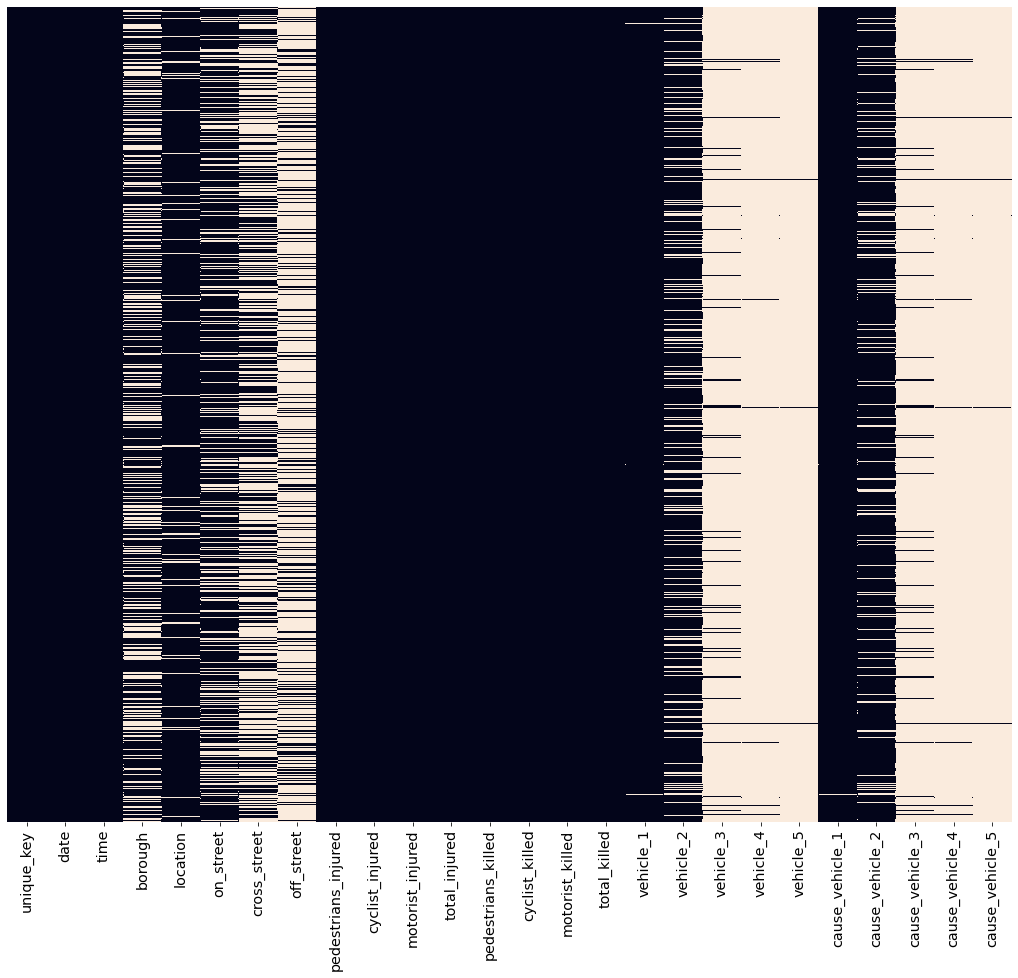

In [20]:
plot_null_matrix(mvc)

In [22]:
def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()

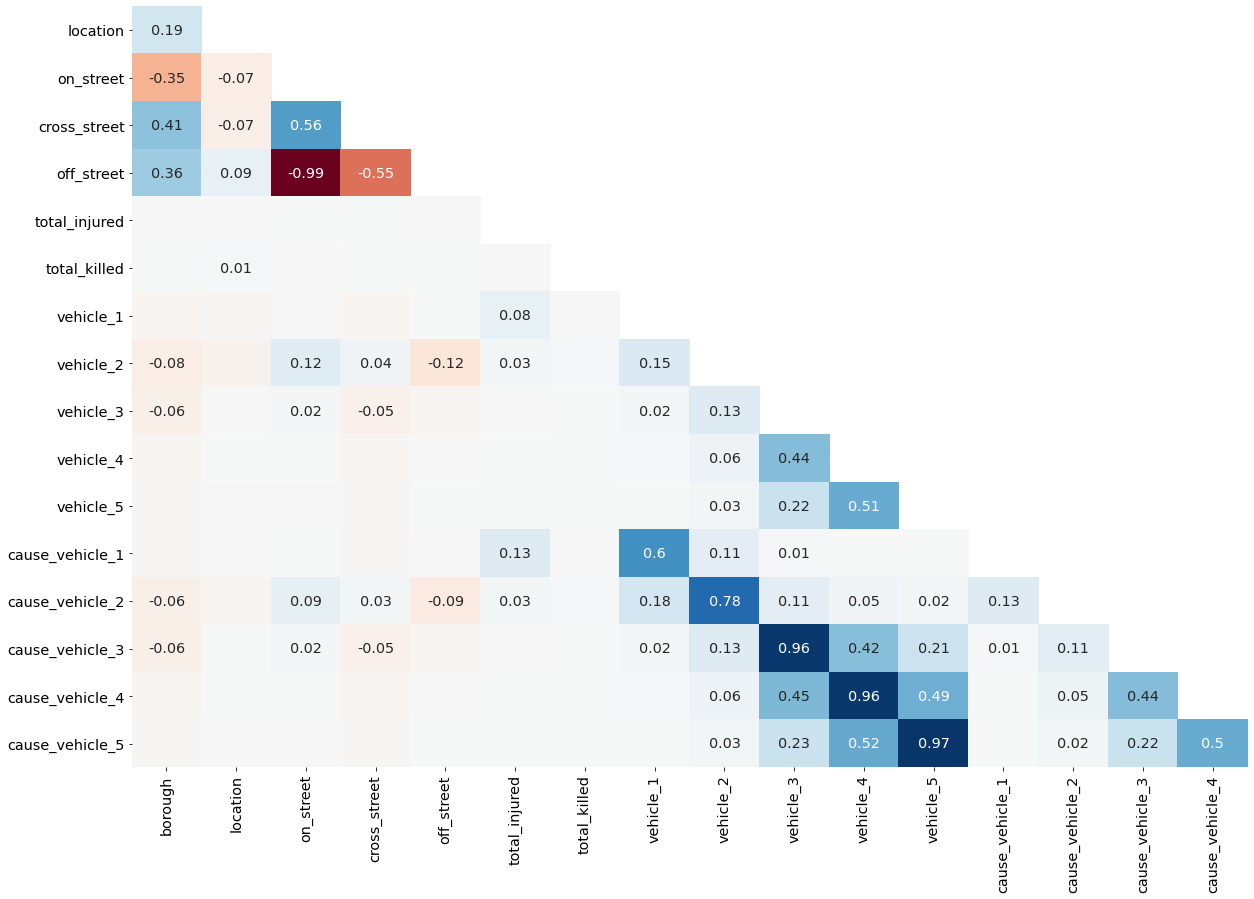

In [23]:
plot_null_correlations(mvc)

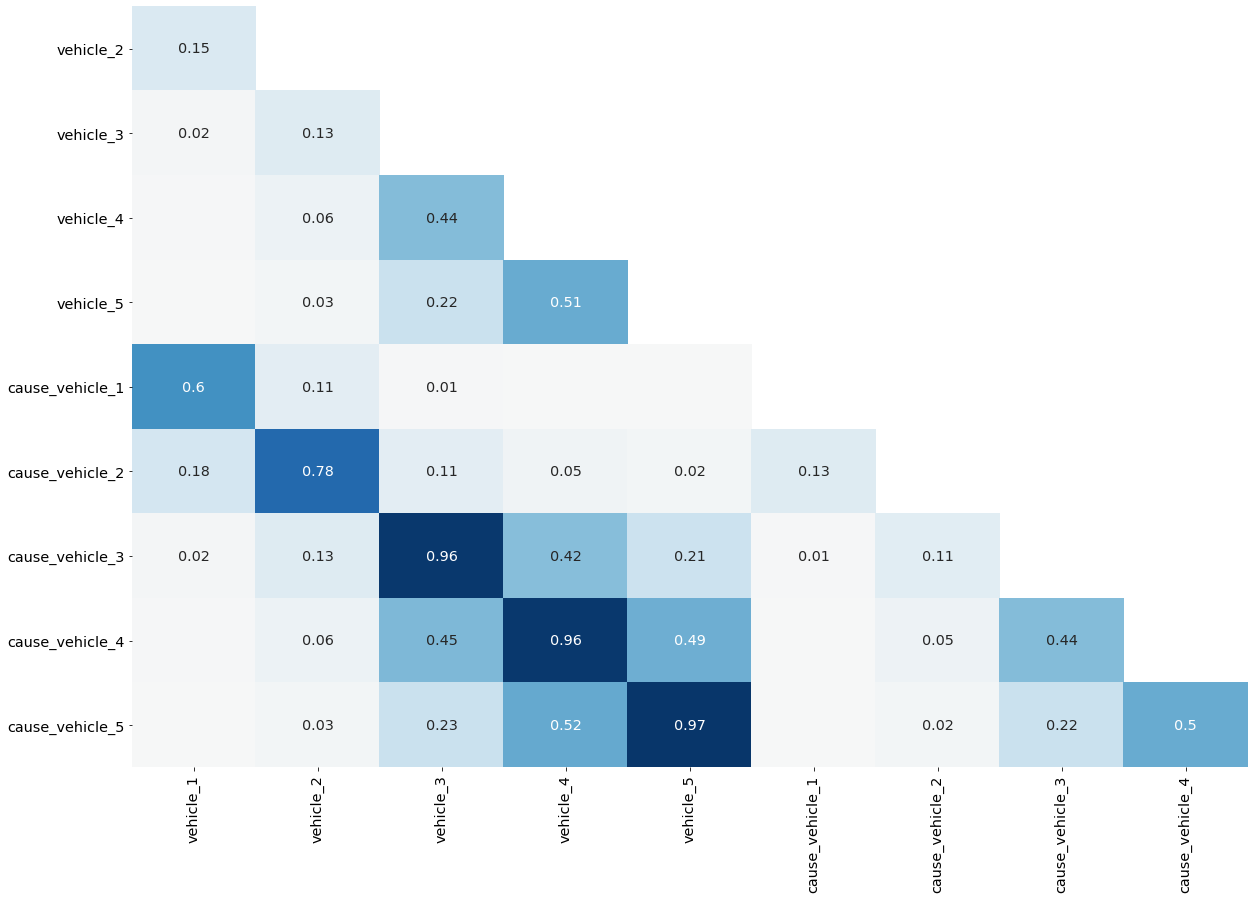

In [28]:
vehicle_cols = [col for col in mvc.columns if 'vehicle' in col]
plot_null_correlations(mvc[vehicle_cols])

In [50]:
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']

vc_null_data = []

for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_null =(mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
    c_null =(mvc[c_col].isnull() & mvc[v_col].notnull()).sum()
    vc_null_data.append([v,v_null, c_null])
    
vc_null_df = pd.DataFrame(vc_null_data, columns = col_labels)

In [51]:
vc_null_df

,v_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


In [62]:
v_col = [col for col in mvc.columns if col.startswith("vehicle")]
vehicle_cols = mvc[v_col]
vehicle_stack = vehicle_cols.stack()
top10_vehicles = vehicle_stack.value_counts().head(10)

In [63]:
top10_vehicles

Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
Pick-up Truck                           2373
TAXI                                    1892
Box Truck                               1659
Bike                                    1190
Bus                                     1162
dtype: int64

In [64]:
def summarize_missing():
    v_missing_data = []

    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)

        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()

        v_missing_data.append([v, v_missing, c_missing])

    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

summary_before = summarize_missing()

for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_mask = mvc[v_col].isnull() & mvc[c_col].notnull()
    c_mask = mvc[c_col].isnull() & mvc[v_col].notnull()
    mvc[v_col] = mvc[v_col].mask(v_mask, 'unspecified')
    mvc[c_col] = mvc[c_col].mask(c_mask, 'unspecified')
    
summary_after = summarize_missing()

In [65]:
summary_before

,vehicle_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


In [66]:
summary_after

,vehicle_number,vehicle_missing,cause_missing
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


In [ ]:
pd.concat